In [1]:
import numpy as np
np.random.seed(14)

# Predicting House Sale Prices in Amos, Texas

### Abstract

The housing market is a deeply influential aspect of our economy. Banks, real-estate companies, and individuals have a large interest in predicting the selling price of a property. We focused on a segment of the population: property sales in Amos, Texas from 2006-2010. Our objectives were two fold. First, we strove to understand which features are most instrumental in deciding a sale price. Second, how can we use these features to accurately predict the price bucket or sale price of a property?

We explored our data and the many features it contains; we did this to the data as a whole as well as by neighborhood. We discovered that many dimensions are needed to capture a majority of the variance in the model, and although features that measure square footage and quality are ranked top in importance by several features rating algorithms, they alone cannot accurately predict class or price. We created two models for classification: a support vector model and a random forest classifier. Both achieved similar test metrics, significantly outperforming a dummy classifier. Lastly, we explored several models for a regression including: linear regression, lasso regression, random forest regression, and SVM regression. All models achieved similar r-squared metrics on the validation data, between .86 and .89.


### Introduction

Our goal was to accurately predict the sale price or price bucket of a property in Amos, Texas and to understand the factors that determine this price. We did this using a dataset consisting of all property sales in Amos, Texas from 2006-2010. Predicting sale price is important because the expected sale price determines factors such as bid prices and mortgage rates. The sale price of a property is the foundation for many financial decisions that run the real-estate market. After rudimentary data wrangling, such as filling NA values, we explored our data. We discovered that SalePrice is right skewed; we therefore deal with the log of SalePrice, which is more normally distributed.

After cleaning the data we continued to explore the data and its features. Performing PCA showed that 30 dimensions are needed just to account for 50% of the variance in the model; this revealed the complexity of the data foreshadowing that a significant number of features will likely be needed for high model performance. We analyzed feature importance using features scores from gradient boosting, a random forest, and variance. All techniques agreed that the following features are among the top 10 most influential features: ground living area, finished basement square footage, lot area, garage area, and total basement square footage. For all models we analysed the relevant metrics on an increasing number of features, according to several feature rankings, to determine the optimal number of features for that model. 

Before attempting to predict price we first explored several classification techniques to predict the general price bucket: 0 to 120,000 dollars, 120,000 to 200,000 dollars, or greater than 200,000 dollars. For classification we used a SVM and a Random Forest and compared our results to a baseline dummy classifier. Hyperparameters were chosen using several grid searches. Both models significantly outperformed the baseline and both models performed similarly on validation and test data: f1 scores greater than 0.8, the random forest using 7 features and the SVM using 15. However, the random forest did exhibit signs of overfitting.

Lastly, we developed a regression model to predict price. We explored linear regressions in addition to SVM and random forest regressions. The linear model required regularization: both Lasso and Ridge were explored. Hyperparameters were again chosen using several grid searches. Again all models achieved a similar level of accuracy with r-squared test scores between .86 and .89. The random forest used the fewest features; however, it had signs of overfitting and achieved the lowest test score of all the models. 

### Background



The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. Since it is one of the topics that attract many people’s interest because of being a very common issue -searching a house, various criterion, price, etc.-, there are many studies on the data conducted before (De Cock, D. 2011).

Chenghan Yang(2018) shows on his study how increasing number of features affects R-squared score on models and he did this feature selection by SelectKBest method which we also used as one of feature selection technique. His results are the same with ours in that R-squared score doesn’t improve after selecting 30-35 features. 

In another work done by Eamon Fleming, the focus is on preprocessing data and feature engineering because it is the most important step to get a reliable result from a model. The top features are found as above ground living area, overall quality, overall condition, basement living area. He used regularized regression Ridge, Lasso, and Elasticnet for predicting house prices and obtained successful results by those models in that he ranked 5th in kaggle competition (Fleming, n.d.). 

Many studies on this dataset are regarding regression on the house price -as we did-. However, there are some studies focusing on different things as well. One example of this is conducted by Abhishek Das(2017) which is to determine the features in the data can predict abnormal sales. He states that “Certain houses have their condition classified as Abnormal. These types of sales are in the minority and trying to classify these sales will be affected by a class imbalance problem.” 

One similar study to ours created price ranges for classification task. They created 7 bins and ran different algorithms on the data. Support Vector Machine and Random Forest they built gave the best accuracy %67 according to their results (Hujia Yu & Jiafu Wu, 2016). 


### Data

In [2]:
import pandas as pd
from project import get_cleaned_data, get_eda_data
from sklearn.model_selection import train_test_split

# get_data cleans the data and converts to fully numeric data
data, target = get_cleaned_data('train.csv')
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.3)
X_train_uncleaned = get_eda_data('train.csv')
y_train_binned = [0 if price <= 120000 else 1 if price <= 200000 else 2 for price in y_train]
y_test_binned  = [0 if price <= 120000 else 1 if price <= 200000 else 2 for price in y_test]
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
columns = data.columns

Dataset from Kaggele:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques.

The dataset describes the sale of houses in Ames, Iowa from 2006 to 2010. The data set contains almost 3000 observations and 80 explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in evaluating house value. They focus on the quality and quantity of many physical attributes of the house. Most of them are the type of information that many customers would like to know about potential houses such as how big is the lot? How many square feet of living space is in the dwelling? When was it built? Is the basement finished? How many bathrooms are there?).

The 20 continuous variables are related to various area dimensions for each observation. In addition to the typical lot size and total dwelling square footage, area measurements on the basement, main living area, and even porches are broken down into individual categories based on quality and type.

The 14 discrete variables quantify the items count within the house such as the number of kitchens, bedrooms, and bathrooms located in the basement and above living areas of the home. In addition, the garage capacity and construction or remodelling dates are recorded.

There are a large number of categorical variables (23 nominal, 23 ordinal). They have various ranges of categories such as the smallest being STREET (gravel or paved) and the largest being NEIGHBORHOOD. The nominal variables identify various types of dwellings, garages, materials, and environmental conditions while the ordinal variables rate various items within the house.

From data description we noticed some columns that have NA, but NA here indicates a meaning not a really missing value. In Alley column, NA means "No alley access". In BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtFinSF1 columns, NA means "No Basement". In FireplaceQu column, NA means "No fireplace". In GarageType, GarageCond, GarageFinish columns, NA means "No Garage". In PoolQC column, NA means No Pool. In Fence column, NA means "No Fence". In MiscFeature column, NA means "None". Thus, we had to replace all NAs in these columns to make pandas read them as not missing values.

LotFrontage (Linear feet of street connected to property) column has 259 missing values. We cannot drop them because we will lose information so we will fill them by the mean, but since we seek more accuracy, we will fill each missing value by the mean of its category of Lot configuration. We have 5 classes in Lot configuration (Inside, Corner, CulDSac, FR2, and FR3). Therefore, for example, if we have a missing value in the ‘inside’ class, we fill it by the mean of the ‘inside’ class not the mean of the whole column. For GarageYrBlt (Year garage was built) column, missing values are because there is no garage so we will fill them by buillding year of the house, then to make it more meaningful we subtract this column by YearBuilt (Year house was built) column. In MasVnrType (Masonry veneer type) and MasVnArea (Masonry veneer area in square feet) columns, missing values are the same. Consequently, we filled them with “None” as most common. For electrical (electrical system) column, it has only one missing value, thus we will drop it.

As we mentioned the data has ordinal and nominal variables. For converting the ordinal variables, we wrote a function to convert each one of them into ranked numbers while we used dummy variables for nominal variables.

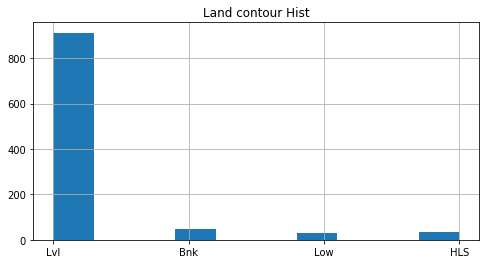

In [3]:
from project import hist_LandContour
hist_LandContour(X_train_uncleaned)

The variable of Land Contour is majority one value, level. We converted this column into a boolean column of level or unleveled, since each alternative value independently has very few instances. The variable 'Street' is 99.7% the value 'paved' with only 3 exceptions so we chose to drop the variable. The variable 'Utilities' is completely uniform in our train set so we will drop that variable as well. Lastly, the variable 'RoofMatl' is 98% one value ('CompShg'), 'Condition2 is 99% one value ('Norm'), Heating is 98% on value ('GasA'), 'LowQualFinSF' is 98% the value of 0, and '3SsnPorch' is 99% 0, so we drop these variables. If pool quality is a duplicate of pool size, 0 when no pool exists, we drop one. If there is a misc feature is a duplicate of misc feature value, so we drop one as well. Lastly, we drop month sold since it is incorrectly a numeric value and uncorrelated with the target value.

blah blah all the data wrangling and stuff

### Methods

When exploring our data we discovered that our target variable was right-skewed so when modeling our regression we scaled it by taking the natural log of the target. Doing this converted the target variable to a more normal looking distribution which will benefit our regression models. We also normalized our data using the sklearn’s StandardScaler. Since the random forest does not require standardized data, but all our other models do, we included this step in the model pipeline when necessary. 

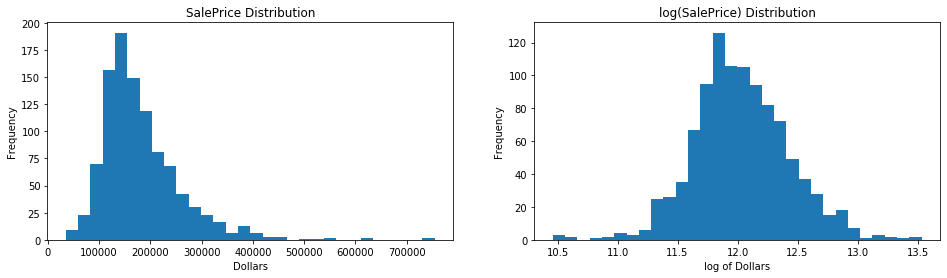

In [4]:
from project import plot_price_distribution
plot_price_distribution(y_train, y_train_log)

We used Isolation Forest algorithm for detecting outliers. It is different from other popular outlier detection methods because it identifies anomalies instead of profiling normal data points. It's an unsupervised learning algorithm that identifies anomaly by isolating outliers in the data.

It is based on the Decision Tree algorithm. It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the max and min values of that feature. This random partitioning of features will produce shorter paths in trees for the anomalous data points, thus distinguishing them from the rest of the data.

The Isolation Forest algorithm is based on the principle that anomalies are observations that are few and different, which should make them easier to identify. It uses an ensemble of Isolation Trees for the given data points to isolate anomalies. It recursively generates partitions on the dataset. The anomalies need fewer random partitions to be isolated compared to normal points in the dataset, thus the anomalies will be the points which have a smaller path length in the tree. The path length is the number of edges traversed from the root node. After applying it on our dataset. It gave us five outliers which we will test their effect in our models.

For each model we used for regression or classification, we did hyperparameter tuning to be able to reach the best output. To this aim, we benefit from GridSearchCV from sklearn module which makes a grid search on all parameters given as input and using k-fold cross validation, in that k is also given as parameter. Firstly, the parameters are found for regression models we used which are linear regression -both simple and regularized-, random forest, and SVM. 

The parameter to be tuned for Ridge and Lasso regularized regression is  “alpha” and it was found as 0.05 for Ridge regularized and 0.0005 for Lasso regularized regression models we built. After that, we conducted a grid search for Random Forest Regressor which has the parameters max depth, minimum number of samples required to split, minimum number of samples required to be at a leaf node, and number of trees in the forest. After a long lasting grid search the best parameters are found as 
'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2,'n_estimators': 300. 

And lastly, there are parameters C: regularization parameter and kernel type for Support Vector Machine. The best result we got is ‘C’ 0: 0.1 and ‘kernel’: ‘linear’. 

We also found best parameters for classification algorithms similarly, using grid search. For Random Forest Classifier, 
{ 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100 } 
and for SVM, {'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear' } are obtained. As following work, we used these parameters for training our models. 


Gradient Boosting is one of the algorithms we used for features importance.  Importance provides a score that indicates how useful each feature was in the model. The more an feature is used to make key decisions, the higher its relative importance. This importance is calculated for each feature in the dataset, allowing them to be ranked. The importance of a feature is computed as the total reduction of the criterion brought by that feature. It is known as the Gini importance.

First, we used it to select important features using the whole dataset. Then, comparing its results with other feature selection algorithms as we will see below. After that, as we seek more investigation through binning the dataset by neighborhood. We used gradient boosting to detect what are the top features that affect the house price in each neighborhood. This can help customers by telling them where to look if they search for specific features.

We used PCA and LDA to visualize our data and look for patterns.

/Users/tovaschwartz/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


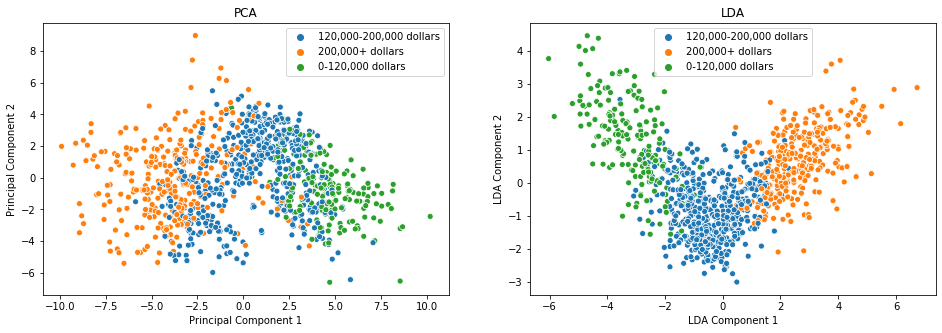

In [5]:
from project import plot_pca_and_lda    
plot_pca_and_lda(X_train, y_train)

We see from these visualization techniques that the data, in only two dimensions, is highly linearly separable; this means that we should be able to develop an effective classifier. We also used PCA to see if the many features can be effectively compressed into lower dimensions. When graphing the cumulative explained variance the following was our results.

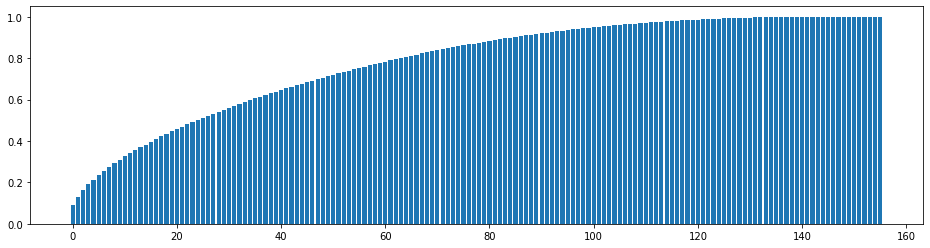

In [6]:
from project import graph_cum_variance
graph_cum_variance(X_train, y_train)

We see from here that the data is complex and multidimensional. Thirty principal components are required to account for 50% of the variance. Instead of using a select number of principal components to build our model we will seek out the model features that are most instrumental. This will also benefit our goal of understanding the factors that influence price by increasing the interpretability of our model.

We investigated the correlation between features by using a heatmap. We were interested more in top features correlated with our target, thus we used another heatmap for visualizing the correlation of the top 10 features with sale price. This heatmap gave an intuition about the results of feature selection algorithms we used

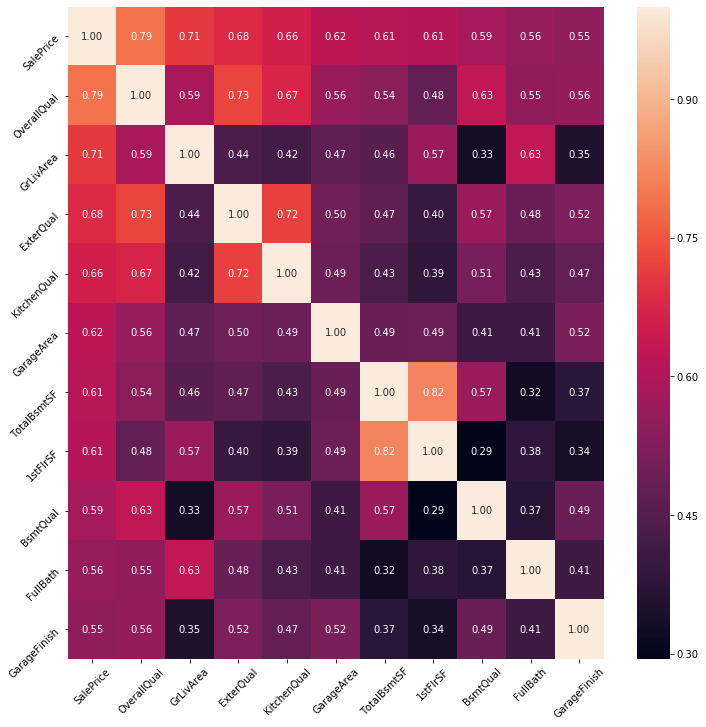

In [7]:
from project import top10Heatmap
top10Heatmap('Numerical_train.csv')

We used three techniques for measuring feature importance. We trained a gradient boosting and random forest model on the data and acquired from both of these a list of feature importances. Additionally, we measured the variance in each of the features. We consider all three rankings when performing feature selection. The following chart depicts the set of features that ranked top 10 in any of the feature ranking models. The height of each bar is the number of rankings models, out of the three we used, in which this feature is among the top ten in importance. 

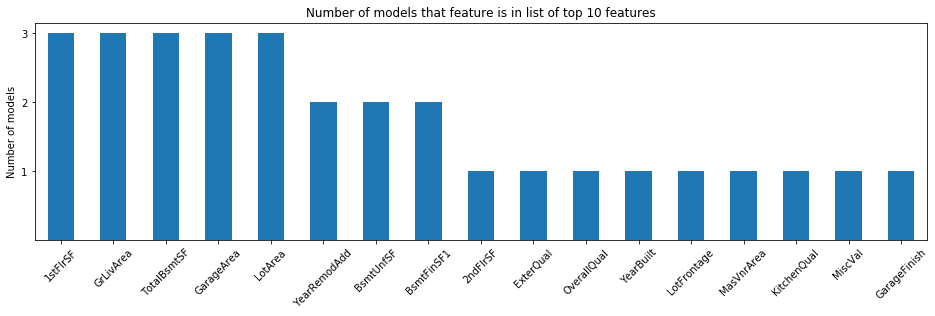

In [8]:
from project import graph_feature_importances
graph_feature_importances(X_train, y_train)

It is interesting to note that features most commonly weighted as important are features measuring square footage. Second in importance, after area measurements, seems to be newness measurements: two age measurements are found in this table. Still high in importance, but less importance than area and age, is subjective quality measurements. It seems that in Amos, Texas square footage is the number one determinant of price.

So far we extracted feature importances from several algorithms; however, we have yet to decide which is the optimal number of features to use. For each model we iterated over an increasing number of features, in order of their ranking, to visualize when additional features are no longer significant. We have several ranking techniques which are similar, but not identical; so for example: the top 10 features from each of the ranking techniques combine to a set of 16 features.

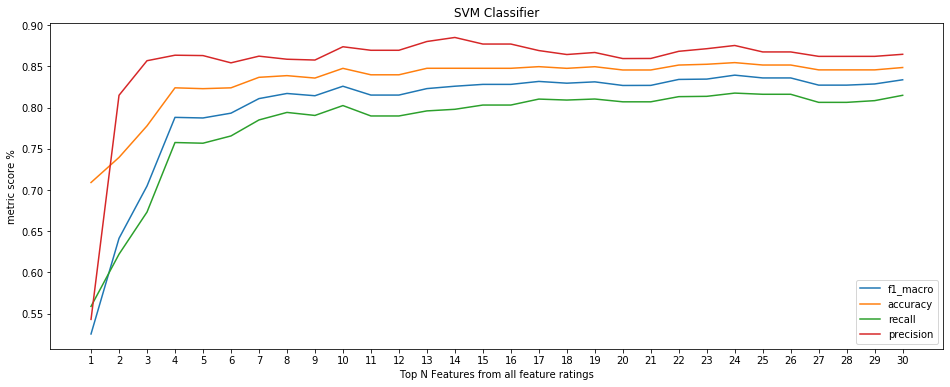

In [9]:
from project import graph_SVC_score_increasing_number_features
graph_SVC_score_increasing_number_features(X_train, y_train, y_train_binned)

SVC meets its optimal performance with the set of the top 8 features from the different feature rating algorithms. This totals to the following 16 features: '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtUnfSF', 'ExterQual', 'GarageArea', 'GarageFinish', 'GrLivArea', 'KitchenQual', 'LotArea', 'MiscVal', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt'.

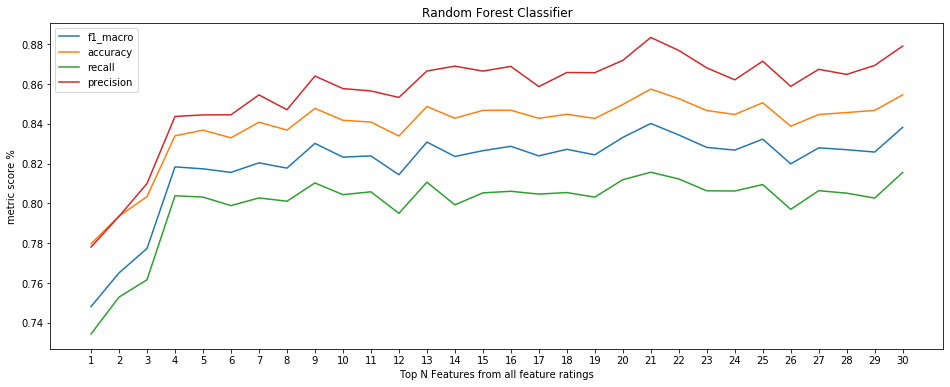

In [10]:
from project import graph_RFC_score_increasing_number_features
graph_RFC_score_increasing_number_features(X_train, y_train, y_train_binned)

The Random Forest Classifier meets its near optimal performance with fewer features: the set of the top 4 features. These are 'BsmtFinSF1', 'GarageArea', 'GrLivArea', 'LotArea', 'MiscVal', 'OverallQual', and 'TotalBsmtSF'.

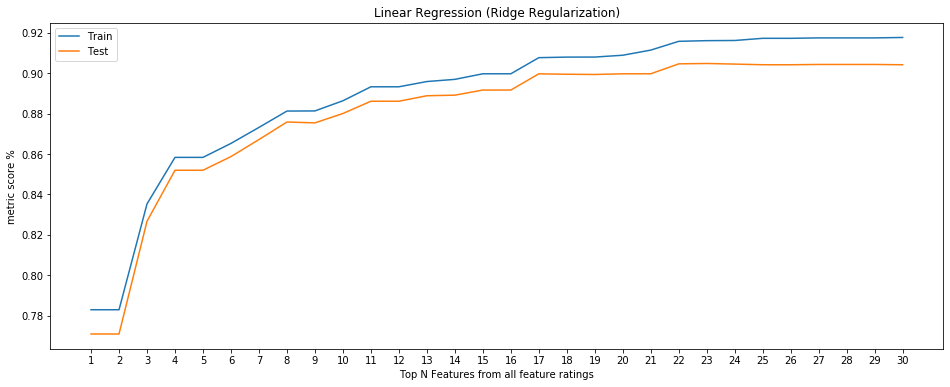

In [11]:
from project import graph_ridge_score_increasing_number_features
graph_ridge_score_increasing_number_features(X_train, y_train)

A linear regression using Ridge regularization meets its optimal performance the the set of top 15 features from each of the three ranking which totals to 28 features. They are: '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'EnclosedPorch', 'ExterQual', 'Fireplaces', 'GarageArea', 'GarageFinish', 'GarageType_Detchd', 'GrLivArea', 'KitchenQual', 'LotArea', 'LotFrontage', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd'.

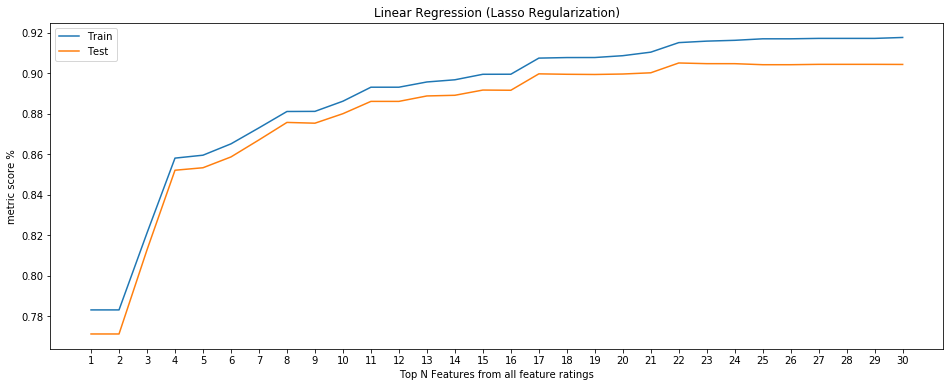

In [12]:
from project import graph_lasso_score_increasing_number_features
graph_lasso_score_increasing_number_features(X_train, y_train)

Linear regression with Lasso regularization is nearly identical to with Ridge regularization.

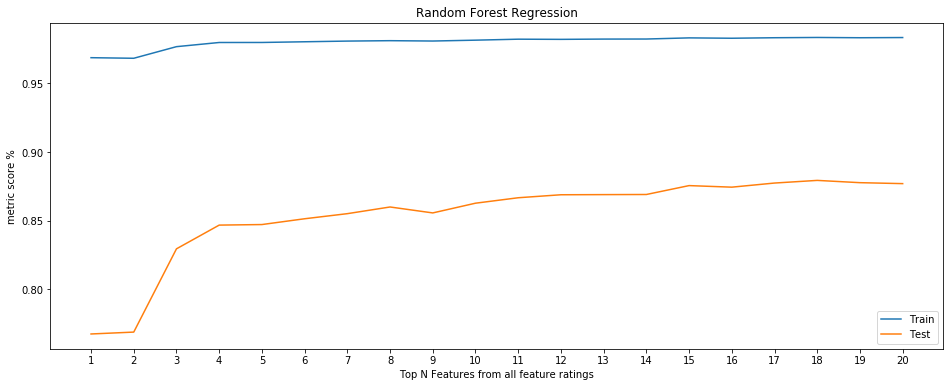

In [13]:
from project import graph_rf_score_increasing_number_features
graph_rf_score_increasing_number_features(X_train, y_train)

The random forest regression, like the classifier, reaches near optimal performance with the same set of top 4 features.

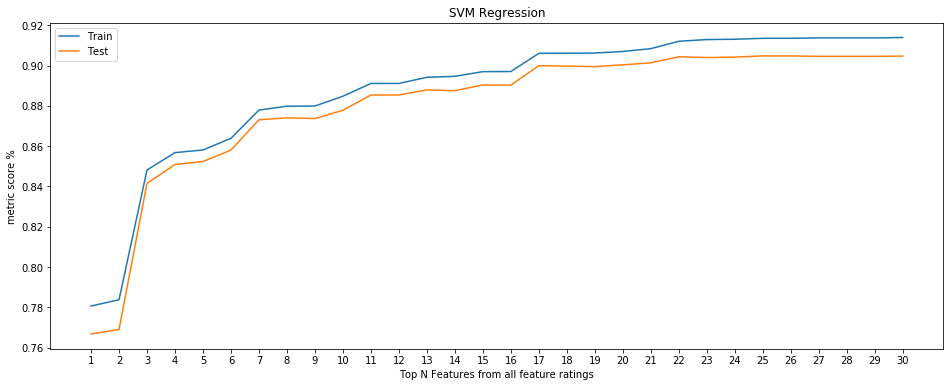

In [14]:
from project import graph_svr_score_increasing_number_features
graph_svr_score_increasing_number_features(X_train, y_train)

The SVM regressor requires more features to reach its optimal performance. It flattens out at the set of top 16 features which totals the same 28 features used in the linear regressions.

### Evaluation


After tuning hyperparameters and selecting features for each model, we trained our models and evaluated by 10-fold cross-validation. 

To start with classification, the first model we used is Random Forest Classifier. We trained the model using best hyperparameters obtained by gridsearch and 7 features selected as mentioned before. Afterwards, we ran a 10-fold cross validation to evaluate the models comparing train and evaluate scores. And finally, we tested the model on our test split. We reported some metrics such as accuracy, f1 score, precision and recall for training with evaluation and testing results. The scores obtained are the following:

| Metric | Train | Validation | Test |
| --- | --- | --- | --- |
| F1 score | 0.9362 | 0.8098 | 0.8111 |
| Recall score | 0.9232 | 0.7903 | 0.8054 |
| Precision score | 0.9523 | 0.8434 | 0.8215 |
| Accuracy score | 0.9424 | 0.8281 | 0.8284 |

As it can be seen, test scores are lower than cross-validated train results showing there is overfitting which can be caused by random forest algorithm’s being vulnerable to overfit. 

The same process (finding hyperparameters, found best selected features, train model) is conducted for Support Vector Machine algorithm and some metrics obtained are as following:

| Metric | Train | Validation | Test |
| --- | --- | --- | --- |
| F1 score | 0.8342 | 0.8178 | 0.8252 |
| Recall score | 0.8101 | 0.7956 | 0.8069 |
| Precision score | 0.8738 | 0.8619 | 0.8568 |
| Accuracy score | 0.8529 | 0.8408 | 0.84897 |

The difference between train and test scores are lower than the one of random forest. So, the overfitting is far less in SVM but the test accuracy score is almost similar to random forest although it is a little bit better than it. ( RF: 0.828  SVM: 0.848) 

Consequently, Random Forest and SVM gave similar accuracies and both gave better results than the baseline (created by DummyClassifier by sklearn). The graph below shows the comparison of these three classification models with different metrics. 


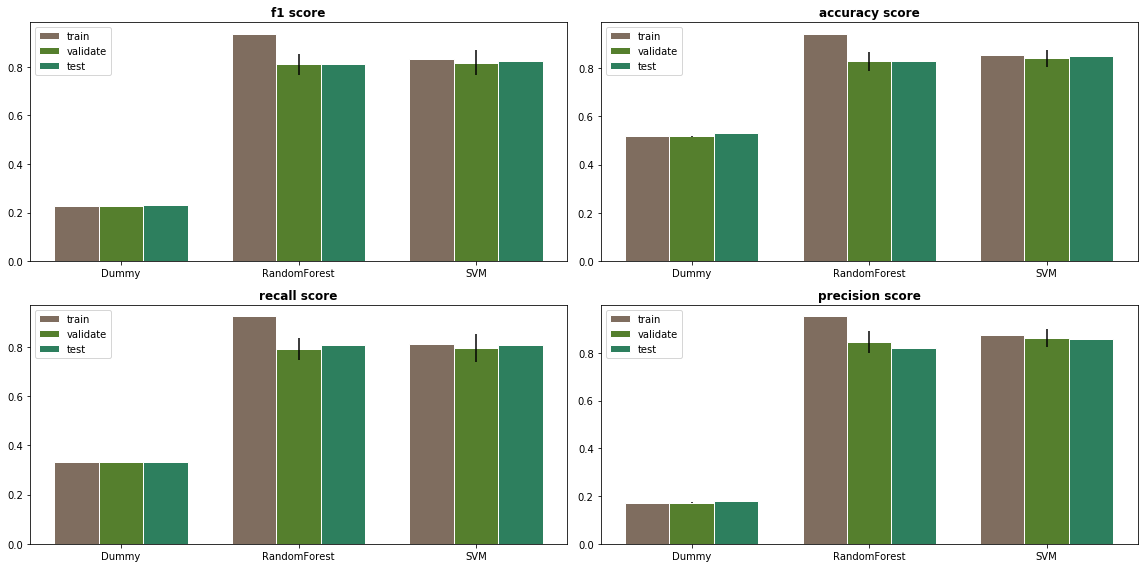

In [15]:
from project import graph_clf_scores
graph_clf_scores()

As to regression, the models we used are regularized linear regression (both Lasso and Ridge) , Random Forest Regressor, and Support Vector Machine. Like in classification, we found best hyperparameters and selected features for each algorithm firstly. And then we trained the models, evaluated them by 10-fold cross validation, and lastly test the algorithms on the test split. R-squared scores obtained are following:

| Model | Train Score | Validation Score | Test Score |
| --- | --- | --- | --- |
| Ridge regularized linear regression | 0.9074 | 0.8993 | 0.8926 |
| Lasso regularized linear regression | 0.9073 | 0.8993 | 0.8938 |
| Random Forest Regressor | 0.9823 | 0.8653 | 0.8653 |
| SVM Regressor | 0.9058 | 0.8988 | 0.8955 |

When we compare the results above, we see that random forest model has the highest difference between train and test/validation score which means it overfit here as well. Other three algorithm has nearly similar train-test scores and among all four algorithms, linear regression ones and SVM have the similar test R-squared value which is around 0.89. Random Forest has lower test score than the others which is 0.86. 
The results can be compared from the graph below as well.


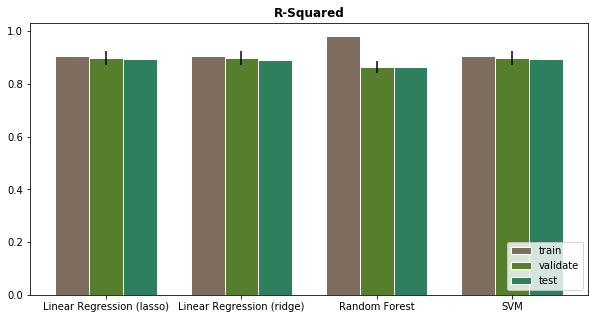

In [16]:
from project import graph_reg_scores
graph_reg_scores()

### Conclussion

We applied several algorithms in this project including Random Forest, Support Vector Machine, Isolation Forest, Gradient Boosting, and Linear regression with lasso and ridge regularization. Only 10 features can account for nearly 90% of variation in price. Using log of the sale price as target value to train models, scores have been increased. Support vector machine performed best among all models in classification and regression problems. After removing the outliers which identified by isolation forest, the scores improved especially in linear regression. We need more data points in each neighbourhood, if we want to develop our models to predict the house price in each neighbourhood separately.  

### Attribution



We all did a lot of everything but main works each person focused on can be seen on the table below. Besides, our github commits and additions can be seen on the graphs.


| Sami | Deniz | Tova |
| --- | --- | --- |
| Data wrangling + feature encoding | Feature selection techniques | Final feature selection for all models |
| Outlier detection | Hyperparameter tuning for all models | Random forest classification |
| Gradient boosting | Regression techniques | Model evaluations and comparisons |
| Neighborhood Analysis | SVM classification | PCA + LDA |
| SVM Regression | Neighborhood analysis | Slides |


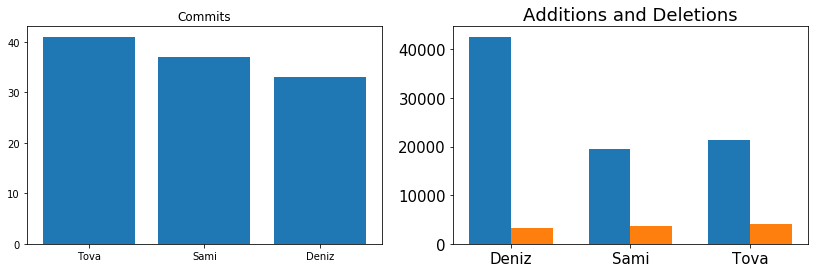

In [17]:
from project import plot_attribution
plot_attribution()

<p><img style="float: center ; margin: 20px 20px 20px 20px; width: 60%" 
src="https://github.com/tgschwartz/MachineLearning_FinalProject/raw/master/Screen%20Shot%202020-05-24%20at%2010.40.40%20AM.png"> </p>

### Bibliography

1. De Cock, D. (2011). Ames, Iowa: Alternative to the Boston housing data as an end of semester regression project. Journal of Statistics Education, 19(3).
2. Chenghan Yang (2018, May 25). Project- Regression and Classification with Ames Housing Data. medium. https://medium.com/@yangchenghan/project-regression-and-classification-with-ames-housing-data-7fcef11298f7<br\>
3. Eamon Fleming (n.d.). Loss Hunters: Predicting Housing Prices with Regression. http://www.eamonfleming.com/projects/housing-regression.html<br\>
4. Hujia Yu & Jiafu Wu (2016). Real Estate Price Prediction with Regression and Classification. http://cs229.stanford.edu/proj2016/report/WuYu_HousingPrice_report.pdf


### Appendex

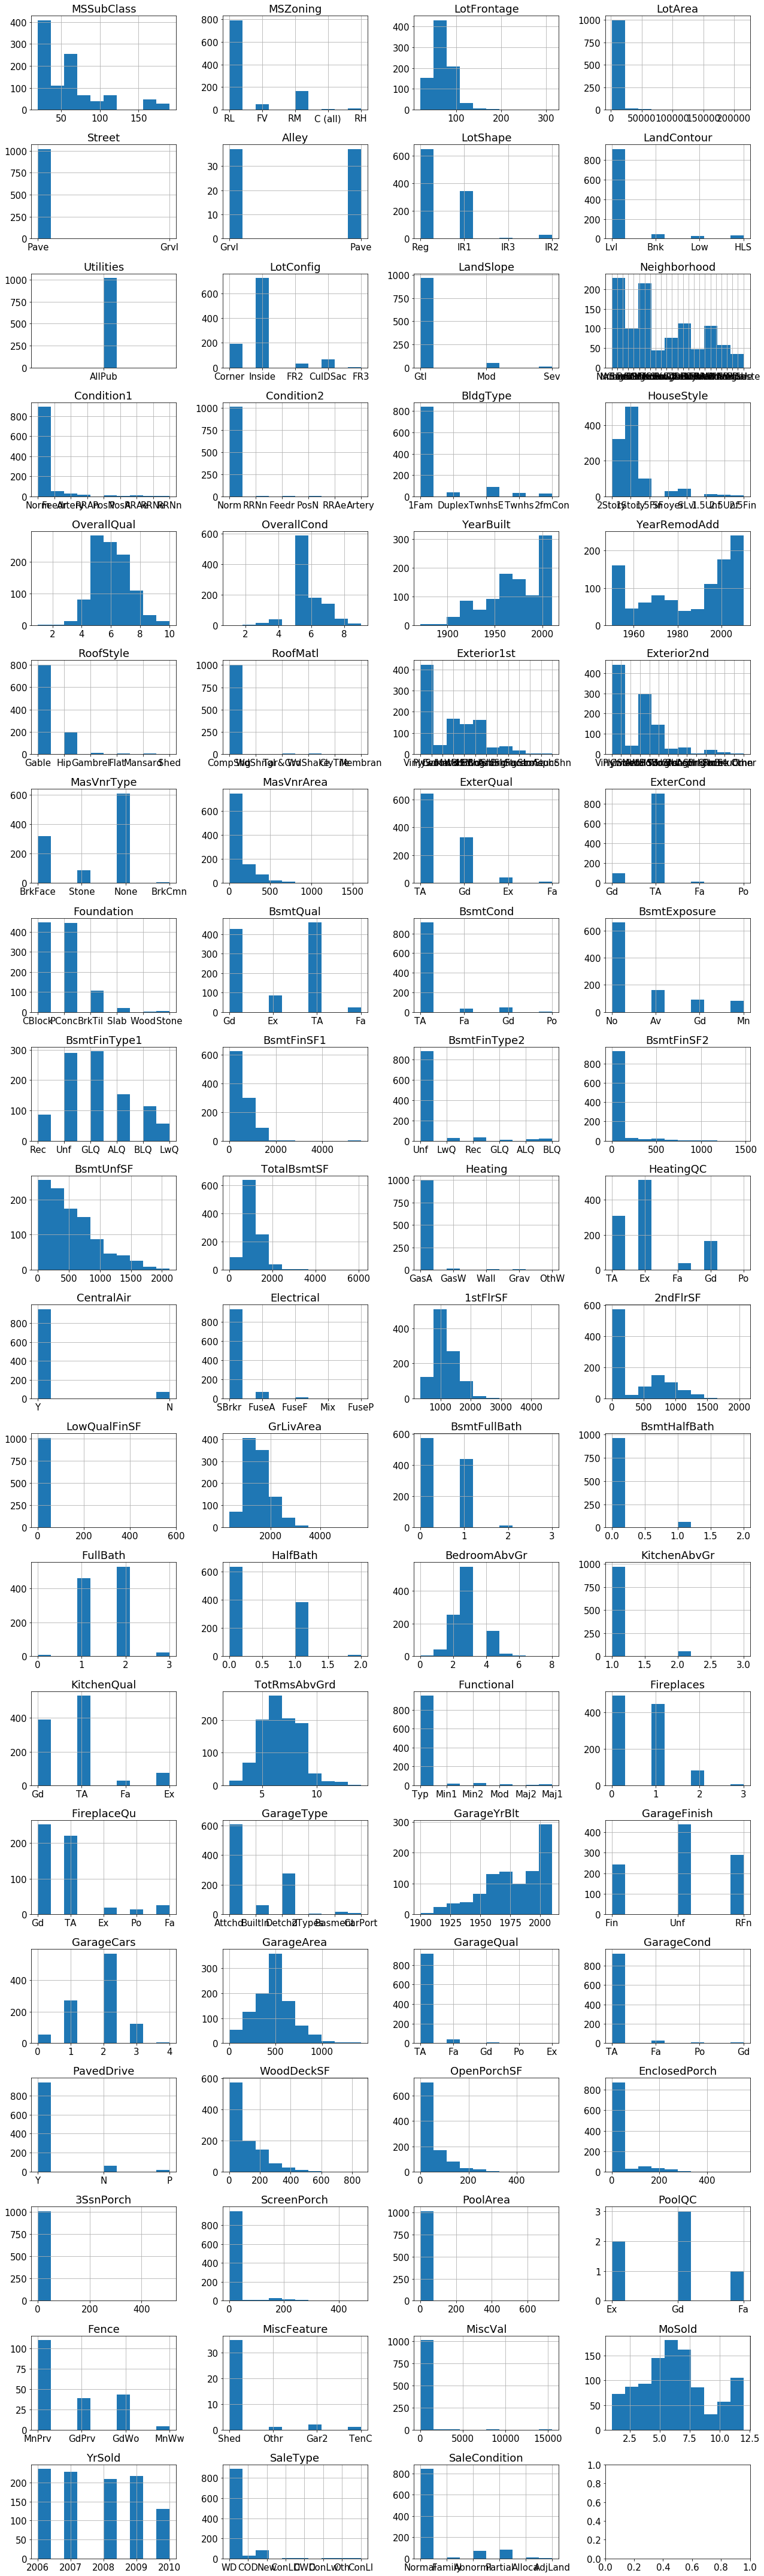

In [18]:
from project import hist_data    
hist_data(X_train_uncleaned)